Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64


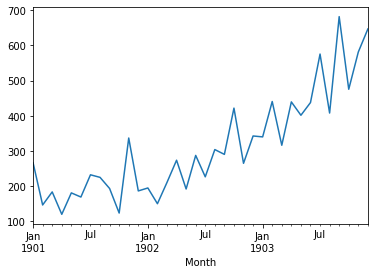

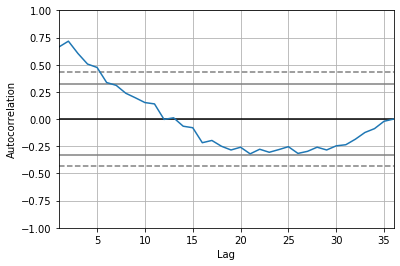

predicted=451.852947, expected=437.400000
predicted=434.420316, expected=575.500000
predicted=446.832460, expected=407.600000
predicted=534.102220, expected=682.000000
predicted=466.271269, expected=475.300000
predicted=674.974749, expected=581.300000
predicted=551.733529, expected=646.900000
Test MSE: 8776.920


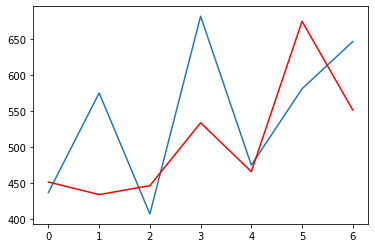

In [2]:
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from matplotlib import pyplot
from pandas import DataFrame
from pandas import concat
from pandas.plotting import autocorrelation_plot
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.ar_model import AR
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

series = read_csv('/Users/ashpe/Desktop/shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
print(series.head())
series.plot()
pyplot.show()


autocorrelation_plot(series)
pyplot.show()

X = series.values
train, test = X[1:len(X)-7], X[len(X)-7:]
# train autoregression
model = AR(train)
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params
# walk forward over time steps in test
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
	length = len(history)
	lag = [history[i] for i in range(length-window,length)]
	yhat = coef[0]
	for d in range(window):
		yhat += coef[d+1] * lag[window-d-1]
	obs = test[t]
	predictions.append(yhat)
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()